# Generating Training Data

In [3]:
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import math
import random

In [4]:
functions = [lambda x : x, 
             lambda x : 101 - x,
             lambda x : 50.5 + 49.5 * math.sin(math.pi / 2 + x / (5 * math.pi)),
             lambda x : random.randint(1, 101)]

In [5]:
points = []
xs = []
ys = []
for i in range(50):
    x = random.randint(1,101)
    y = functions[2](x)
#     print(x, y)
    points.append((x,y))
    xs.append(x)
    ys.append(y)

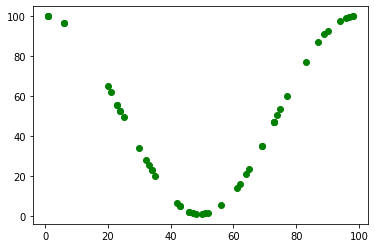

In [6]:
plt.figure()
plt.scatter(xs, ys, color="green")

In [7]:
def plot_function(func_num, plot=True):
    """
    Plot 50 (x,y) pairs for given function
    """
    points = []
    xs = []
    ys = []
    colors = ['maroon', 'blue', 'green', 'orange']
    for i in range(50):
        x = random.randint(1,101)
        y = functions[func_num](x)
    #     print(x, y)
        points.append((x,y))
        xs.append(x)
        ys.append(y)
    if plot:
        plt.figure()
        plt.scatter(xs, ys, color=colors[func_num])
    return (xs, ys)

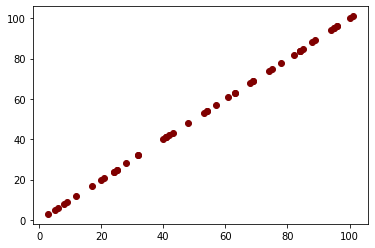

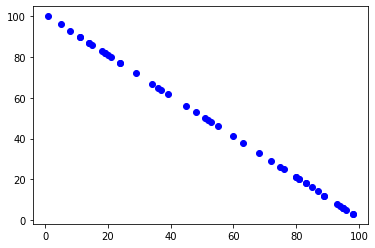

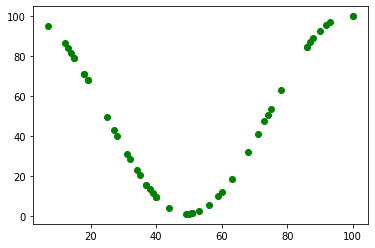

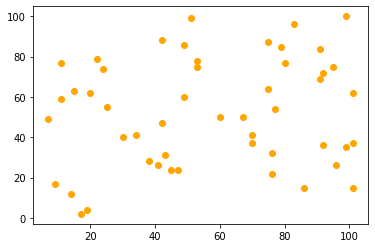

In [8]:
for i in range(4):
    plot_function(i)

In [9]:
def graph_normal(mu, sigma):
    # uncomment this code to graph the normal distribution 

    count, bins, ignored = plt.hist(a, 30, density=True)
    plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
             np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
             linewidth=2, color='r')
    plt.show()

In [10]:
# mu, sigma = 0, 1 # mean and standard deviation
a = np.random.normal(1, 1, 1000)
b = np.random.normal(0, 1, 1000)

In [11]:
asum= 0
for i in range(25):
    asum += a[random.randint(0,len(a)-1)]
print(asum/25)

1.0915706212284573


# Model for Generations with No Priors

25


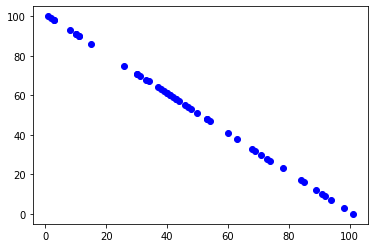

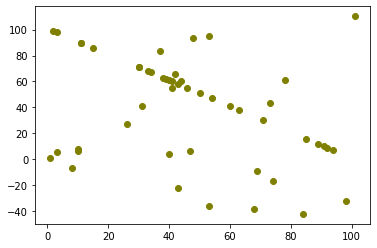

In [26]:
# Step 1 and 2: generate graph for first function
xs, ys = plot_function(1, plot=True)

# Step 3: take first 25 without replacement
bag_x = []
bag_y = []

new_x = []
new_y = []
points_known = []
# do training step
for i in range(25):
    ind = random.randint(0, len(xs)-1)
    x = xs.pop(ind)
    y = ys.pop(ind)
    
    bag_x.append(x)
    bag_y.append(y)

    mu = a[random.randint(0,len(a)-1)] * x + b[random.randint(0,len(b)-1)]
    
    sigma = 0.001
    
    y_guess = np.random.normal(mu, sigma, 1000)
    y_guess = y_guess[random.randint(0,len(y_guess)-1)]
    if abs(y_guess - y) <5:  
        points_known.append((x, y_guess))
    new_x.append(x)
    new_y.append(y)
    
input(len(xs))
# do test step
for i in range(25):
    ind = random.randint(0, len(xs)-1)
    x = xs.pop(ind)
    y = ys.pop(ind)
    
    bag_x.append(x)
    bag_y.append(y)

    #have subject condition on points_known
    mu = a[random.randint(0,len(a)-1)] * x + b[random.randint(0,len(b)-1)]
    
    sigma = 0.001
    
    y = np.random.normal(mu, sigma, 1000)
    y = y[random.randint(0,len(y)-1)]
    
#     # alternative method to sample from normal
#     y = mu + np.random.normal() * sigma
    
    new_x.append(x)
    new_y.append(y)

# graph after one generation

plt.figure()
plt.scatter(new_x, new_y, color="#808000")

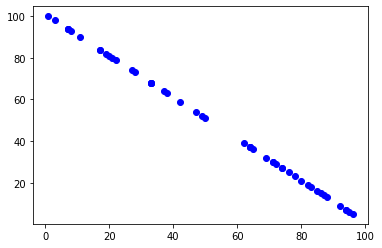

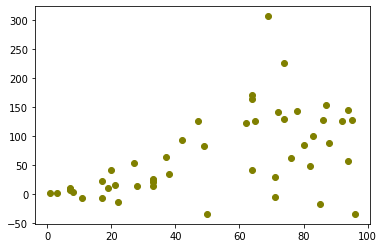

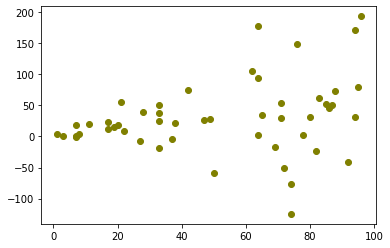

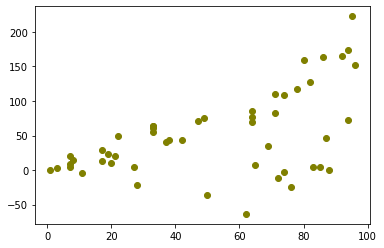

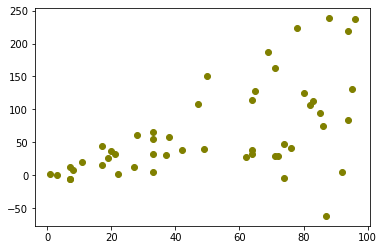

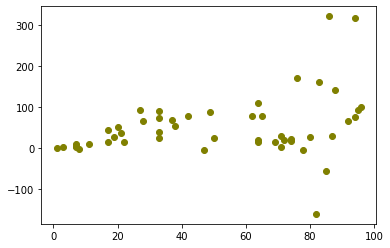

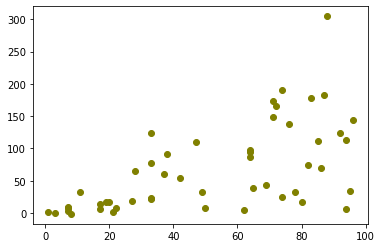

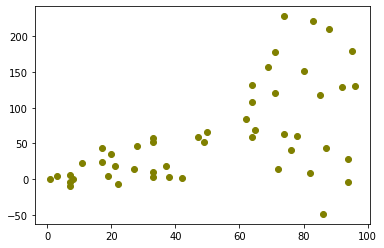

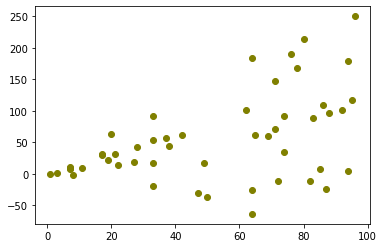

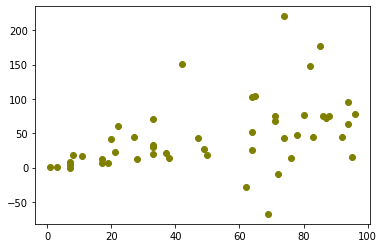

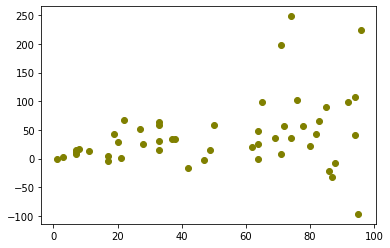

In [30]:
#### for multiple generations


# Step 1 and 2: generate graph for first function
xs, ys = plot_function(1, plot=True)

# Step 3: take first 25 without replacement
bag_x = []
bag_y = []

for i in range(10):
    new_x = []
    new_y = []

    # training step
    xs_train, xs_test = xs[25:50], xs[0:25]
    ys_train, ys_test = ys[25:50], ys[0:25]
    for i in range(25): 
        ind = random.randint(0, len(xs_train)-1)
        x = xs_train.pop(ind)
        y = ys_train.pop(ind)

        bag_x.append(x)
        bag_y.append(y)

        mu = a[random.randint(0,len(a)-1)] * x + b[random.randint(0,len(b)-1)]

        sigma = 0.001

        y = np.random.normal(mu, sigma, 1000)
        y = y[random.randint(0,len(y)-1)]

        y_guess = np.random.normal(mu, sigma, 1000)
        y_guess = y_guess[random.randint(0,len(y_guess)-1)]
        if abs(y_guess - y) <5:  
            points_known.append((x, y_guess))
        new_x.append(x)
        new_y.append(y)

    # test set
    for i in range(25):
        ind = random.randint(0, len(xs_test)-1)
        x = xs_test.pop(ind)
        y = ys_test.pop(ind)

        bag_x.append(x)
        bag_y.append(y)

        #condition on points_known
        mu = a[random.randint(0,len(a)-1)] * x + b[random.randint(0,len(b)-1)]

        sigma = 0.001

        y = np.random.normal(mu, sigma, 1000)
        y = y[random.randint(0,len(y)-1)]

    #     # alternative method to sample from normal
    #     y = mu + np.random.normal() * sigma

        new_x.append(x)
        new_y.append(y)

    # graph after one generation

    plt.figure()
    plt.scatter(new_x, new_y, color="#808000")
    
    xs = new_x
    ys = new_y

# Model For Generation with Priors

In [11]:
def get_subject_func_extremes(xs, ys, x):
    tups = []
    for ind in range(len(xs)):
        tups.append((xs[ind],ys[ind]))
    tups.sort()
    x1,y1 = tups[0]
    x2,y2 = tups[-1]
    slope = (y2 -y1)/(x2 -x1)
    y_int = y1 - slope*x1
    return x * slope + y_int

def get_subject_func_priors(xs, ys, x):
    functions = [(100, -1), (100, -2), (75, -1), (1, 0), (2, 0), (3, 0)] #tuples of slope and y_intercept of functions
    y_max_ind = ys[max(y)]
    if abs(max(y) - xs[y_max_ind]) > 20: #place higher weight on negative slopes
        probs = [0.4, 0.2, 0.1, 0.2, 0.05, 0.05]
    else:
        probs = [0.2, 0.05, 0.05, 0.4, 0.15, 0.15]   
        
    # elements at corresponding indices of functions and probs should be paired together, 
    # i.e. y = 100 - x has a prior probability of 0.4 

    cum_sum_probs = [probs[0]]
    for ind in range(1, len(probs)):
        cum_sum_probs.append(cum_sum_probs[-1]+probs[ind])
    
    #determine which function to select
    prob = random.randint(0, 100)
    for ind in range(len(cum_sum_probs)):
        threshold = cum_sum_probs[ind] * 100
        if prob <= threshold:
            slope, y_int = functions[ind]
            return slope * x + y_int
    slope, y_int = functions[-1]
    return slope*x+y_int


TypeError: 'int' object is not iterable

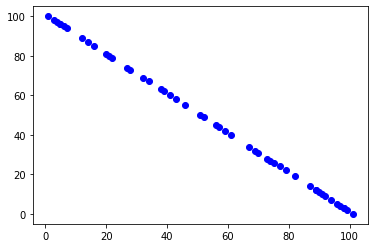

In [12]:
# Step 1 and 2: generate graph for first function
xs, ys = plot_function(1, plot=True)

# Step 3: take first 25 without replacement
bag_x = []
bag_y = []

new_x = []
new_y = []
for i in range(25):
    ind = random.randint(0, len(xs)-1)
    x = xs.pop(ind)
    y = ys.pop(ind)
    
    bag_x.append(x)
    bag_y.append(y)

    mu = a[random.randint(0,len(a)-1)] * x + b[random.randint(0,len(b)-1)]
    
    sigma = 0.001
    
    y = np.random.normal(mu, sigma, 1000)
    y = y[random.randint(0,len(y)-1)]
    
#     # alternative method to sample from normal
#     y = mu + np.random.normal() * sigma
    
    new_x.append(x)
    new_y.append(y)

# have the subject label 25 points
for i in range(25):
    ind = random.randint(0, len(xs)-1)
    x = xs.pop(ind)
    y = ys.pop(ind)
    
    bag_x.append(x)
    bag_y.append(y)
    
    #subject gets the x that they have to label, along with the xvalues and corresponding yvalues they know so far
    subject_y = get_subject_func_priors(new_x, new_y, x)
    
    new_x.append(x)
    new_y.append(subject_y)

# graph after one generation

plt.figure()
plt.scatter(new_x, new_y, color="#808000")